# Electricity

## initializing dataset

In [55]:
import pandas as pd
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


In [56]:
df = pd.read_csv("/Users/Bilal/PycharmProjects/LearningAI/Files/assignment_6/task3/electricity.csv")

/var/folders/21/07m86yd55y193jhyr9vsmzqh0000gp/T/ipykernel_3131/3858495130.py:1: DtypeWarning: Columns (9,10,11,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/Bilal/PycharmProjects/LearningAI/Files/assignment_6/task3/electricity.csv")


In [57]:
df.head()

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,01/11/2011 00:00,NaN,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.00,9.30,600.71,356.00,3159.60,54.32
1,01/11/2011 00:30,NaN,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.00,11.10,605.42,317.00,2973.01,54.23
2,01/11/2011 01:00,NaN,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.00,11.10,589.97,311.00,2834.00,54.23
3,01/11/2011 01:30,NaN,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.00,9.30,585.94,313.00,2725.99,53.47
4,01/11/2011 02:00,NaN,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.00,11.10,571.52,346.00,2655.64,39.87


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DateTime                38014 non-null  object
 1   Holiday                 1536 non-null   object
 2   HolidayFlag             38014 non-null  int64 
 3   DayOfWeek               38014 non-null  int64 
 4   WeekOfYear              38014 non-null  int64 
 5   Day                     38014 non-null  int64 
 6   Month                   38014 non-null  int64 
 7   Year                    38014 non-null  int64 
 8   PeriodOfDay             38014 non-null  int64 
 9   ForecastWindProduction  38014 non-null  object
 10  SystemLoadEA            38014 non-null  object
 11  SMPEA                   38014 non-null  object
 12  ORKTemperature          38014 non-null  object
 13  ORKWindspeed            38014 non-null  object
 14  CO2Intensity            38014 non-null  object
 15  Ac

In [59]:
# List of columns to convert
cols_to_float = [
    "ForecastWindProduction", "SystemLoadEA", "SMPEA",
    "ORKTemperature", "ORKWindspeed", "CO2Intensity",
    "ActualWindProduction", "SystemLoadEP2", "SMPEP2"
]

# Convert to float
df[cols_to_float] = df[cols_to_float].apply(pd.to_numeric, errors='coerce')

# Check conversion
print(df[cols_to_float].dtypes)



ForecastWindProduction    float64
SystemLoadEA              float64
SMPEA                     float64
ORKTemperature            float64
ORKWindspeed              float64
CO2Intensity              float64
ActualWindProduction      float64
SystemLoadEP2             float64
SMPEP2                    float64
dtype: object


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DateTime                38014 non-null  object 
 1   Holiday                 1536 non-null   object 
 2   HolidayFlag             38014 non-null  int64  
 3   DayOfWeek               38014 non-null  int64  
 4   WeekOfYear              38014 non-null  int64  
 5   Day                     38014 non-null  int64  
 6   Month                   38014 non-null  int64  
 7   Year                    38014 non-null  int64  
 8   PeriodOfDay             38014 non-null  int64  
 9   ForecastWindProduction  38009 non-null  float64
 10  SystemLoadEA            38012 non-null  float64
 11  SMPEA                   38012 non-null  float64
 12  ORKTemperature          37719 non-null  float64
 13  ORKWindspeed            37715 non-null  float64
 14  CO2Intensity            38007 non-null

In [61]:
df.isna().sum()

DateTime                      0
Holiday                   36478
HolidayFlag                   0
DayOfWeek                     0
WeekOfYear                    0
Day                           0
Month                         0
Year                          0
PeriodOfDay                   0
ForecastWindProduction        5
SystemLoadEA                  2
SMPEA                         2
ORKTemperature              295
ORKWindspeed                299
CO2Intensity                  7
ActualWindProduction          5
SystemLoadEP2                 2
SMPEP2                        2
dtype: int64

In [62]:
df = df.loc[df["SMPEP2"] < 100]

## Dealing with na

In [63]:
df = df.iloc[:, 2:18]
df

,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.0,9.3,600.71,356.0,3159.60,54.32
1,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.0,11.1,605.42,317.0,2973.01,54.23
2,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.0,11.1,589.97,311.0,2834.00,54.23
3,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.0,9.3,585.94,313.0,2725.99,53.47
4,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.0,11.1,571.52,346.0,2655.64,39.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38009,1,1,1,31,12,2013,43,1179.14,3932.22,34.51,6.0,22.2,285.31,812.0,3692.95,42.45
38010,1,1,1,31,12,2013,44,1152.01,3821.44,33.83,5.0,24.1,278.31,852.0,3571.00,33.83
38011,1,1,1,31,12,2013,45,1123.67,3724.21,31.75,4.0,20.4,280.91,962.0,3460.29,31.75
38012,1,1,1,31,12,2013,46,1094.24,3638.16,33.83,5.0,14.8,302.46,950.0,3563.99,50.60


In [64]:
df.dropna(inplace=True)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34351 entries, 0 to 38013
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   HolidayFlag             34351 non-null  int64  
 1   DayOfWeek               34351 non-null  int64  
 2   WeekOfYear              34351 non-null  int64  
 3   Day                     34351 non-null  int64  
 4   Month                   34351 non-null  int64  
 5   Year                    34351 non-null  int64  
 6   PeriodOfDay             34351 non-null  int64  
 7   ForecastWindProduction  34351 non-null  float64
 8   SystemLoadEA            34351 non-null  float64
 9   SMPEA                   34351 non-null  float64
 10  ORKTemperature          34351 non-null  float64
 11  ORKWindspeed            34351 non-null  float64
 12  CO2Intensity            34351 non-null  float64
 13  ActualWindProduction    34351 non-null  float64
 14  SystemLoadEP2           34351 non-null  flo

In [66]:
df.isna().sum()

HolidayFlag               0
DayOfWeek                 0
WeekOfYear                0
Day                       0
Month                     0
Year                      0
PeriodOfDay               0
ForecastWindProduction    0
SystemLoadEA              0
SMPEA                     0
ORKTemperature            0
ORKWindspeed              0
CO2Intensity              0
ActualWindProduction      0
SystemLoadEP2             0
SMPEP2                    0
dtype: int64

In [67]:
df["SMPEP2_lag1"] = df["SMPEP2"].shift(1)
df["SMPEP2_lag24"] = df["SMPEP2"].shift(24)

In [68]:
df.dropna(inplace=True)

## Scale the training and test features

In [69]:
from sklearn.preprocessing import MinMaxScaler

cols_to_scale = [
    "ForecastWindProduction", "SystemLoadEA", "SMPEA", "ORKTemperature", "ORKWindspeed",
    "CO2Intensity", "ActualWindProduction", "SystemLoadEP2"
]
scaler = MinMaxScaler()

# Fit and transform the selected columns
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

## Splitting into train and test

In [70]:
X = df.drop(columns=["SMPEP2"])
X

,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2_lag1,SMPEP2_lag24
25,0,1,44,1,11,2011,25,0.467926,0.676272,0.124349,0.517241,0.268775,0.601307,0.351810,0.630096,58.26,54.32
26,0,1,44,1,11,2011,26,0.496662,0.670154,0.116190,0.551724,0.268775,0.609790,0.385747,0.612913,58.15,54.23
27,0,1,44,1,11,2011,27,0.524113,0.646072,0.116190,0.517241,0.317523,0.615699,0.401584,0.597034,54.74,54.23
28,0,1,44,1,11,2011,28,0.552261,0.650077,0.116190,0.551724,0.292490,0.623683,0.429864,0.596376,54.74,53.47
29,0,1,44,1,11,2011,29,0.590928,0.660715,0.116190,0.517241,0.341238,0.626981,0.423643,0.585955,54.14,39.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38009,1,1,1,31,12,2013,43,0.707439,0.413289,0.071284,0.344828,0.292490,0.338494,0.458710,0.444144,50.60,42.71
38010,1,1,1,31,12,2013,44,0.691150,0.387101,0.069879,0.310345,0.317523,0.330189,0.481335,0.415380,42.45,42.71
38011,1,1,1,31,12,2013,45,0.674134,0.364116,0.065583,0.275862,0.268775,0.333274,0.543552,0.389266,33.83,42.71
38012,1,1,1,31,12,2013,46,0.656464,0.343774,0.069879,0.310345,0.194993,0.358841,0.536765,0.413726,31.75,42.71


In [71]:
y = df.iloc[:, 15]
y

25       58.15
26       54.74
27       54.74
28       54.14
29       53.63
         ...  
38009    42.45
38010    33.83
38011    31.75
38012    50.60
38013    34.90
Name: SMPEP2, Length: 34327, dtype: float64

## splitting the data into train and test sets


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# Regression

## Training the Model

In [73]:
'''
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

print(y_test_log)
'''

'\ny_train_log = np.log1p(y_train)\ny_test_log = np.log1p(y_test)\n\nprint(y_test_log)\n'

In [74]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),

    tf.keras.layers.Dense(1)
])

model.compile(
    loss=tf.keras.losses.mae,
    optimizer='adam',
    metrics=['mae']
)

model.fit(X_train, y_train, epochs=100)

y_pred = model.predict(X_test).ravel()

Epoch 1/100
859/859 ━━━━━━━━━━━━━━━━━━━━ 1s 359us/step - loss: 9.2697 - mae: 9.2697  
Epoch 2/100
859/859 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - loss: 4.7446 - mae: 4.7446
Epoch 3/100
859/859 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - loss: 3.7780 - mae: 3.7780
Epoch 4/100
859/859 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - loss: 3.7539 - mae: 3.7539
Epoch 5/100
859/859 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - loss: 3.3659 - mae: 3.3659
Epoch 6/100
859/859 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - loss: 3.4066 - mae: 3.4066
Epoch 7/100
859/859 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - loss: 3.2821 - mae: 3.2821
Epoch 8/100
859/859 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - loss: 3.3274 - mae: 3.3274
Epoch 9/100
859/859 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - loss: 3.2455 - mae: 3.2455
Epoch 10/100
859/859 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - loss: 3.2649 - mae: 3.2649
Epoch 11/100
859/859 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - loss: 3.1037 - mae: 3.1037
Epoch 12/100
859/859 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step - loss: 3.2145 -

In [75]:
lr = LinearRegression()
lr.fit(X_train, y_train)
library_pred = lr.predict(X_test).ravel()

In [76]:
print("for scikitlearn Library = ", r2_score(y_test, library_pred))
print(r2_score(y_test, y_pred))

for scikitlearn Library =  0.8717846516567277
0.8626082965293645


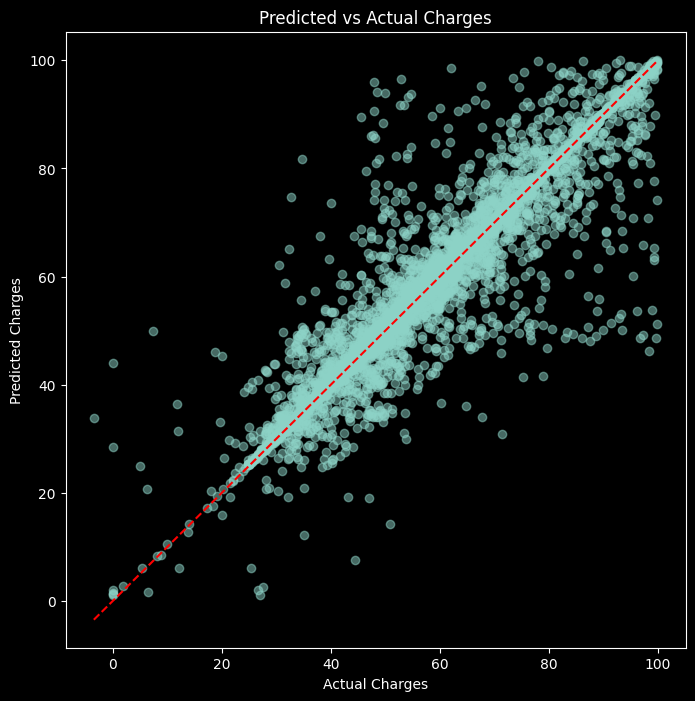

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Predicted vs Actual Charges")
plt.show()


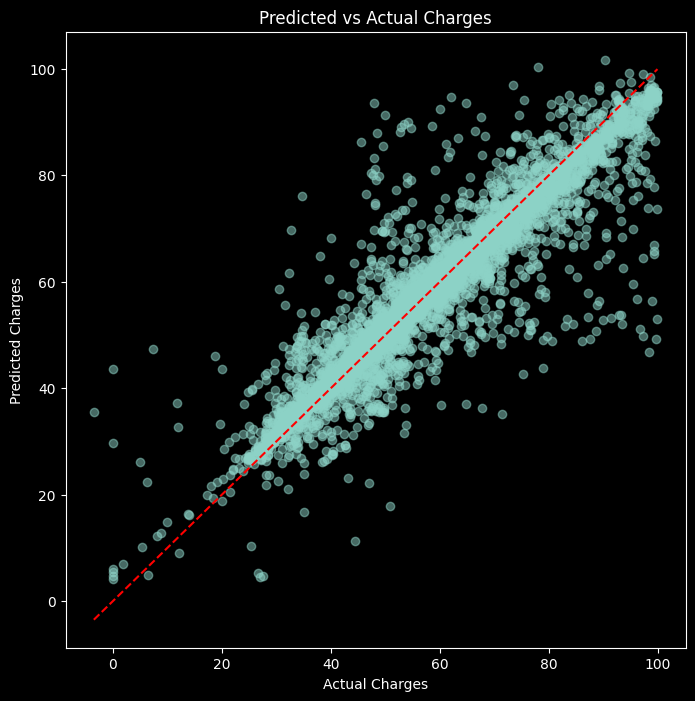

In [78]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, library_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Predicted vs Actual Charges")
plt.show()

In [79]:
X_train

,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2_lag1,SMPEP2_lag24
20051,0,5,51,22,12,2012,37,0.610477,0.760264,0.141804,0.551724,0.463768,0.523016,0.605204,0.702066,62.69,32.25
21845,0,1,5,29,1,2013,7,0.362546,0.291927,0.086817,0.379310,0.194993,0.524677,0.365385,0.276560,44.28,66.90
29570,0,1,28,9,7,2013,4,0.017881,0.150975,0.069260,0.758621,0.171278,0.734529,0.018100,0.207289,39.84,77.50
1782,0,3,49,8,12,2011,6,0.824977,0.292514,0.056825,0.448276,0.512516,0.362626,0.677036,0.234572,27.51,43.86
8646,0,6,17,29,4,2012,8,0.295923,0.120787,0.104437,0.241379,0.243742,0.522767,0.225679,0.172564,43.31,46.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17395,0,6,43,28,10,2012,21,0.587775,0.438676,0.109890,0.379310,0.292490,0.511069,0.523756,0.412828,63.37,59.92
34537,0,6,42,20,10,2013,27,0.250375,0.453824,0.174833,0.620690,0.220026,0.511461,0.223416,0.507082,72.79,30.41
37797,0,4,52,27,12,2013,23,0.852495,0.509872,0.131992,0.344828,0.536232,0.301371,0.791290,0.470479,39.77,35.04
34446,0,4,42,18,10,2013,32,0.697508,0.536469,0.123606,0.620690,0.389987,0.401670,0.582579,0.589109,56.14,29.25


# Decision Tree

In [80]:
import xgboost as xgb

# DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Train regression model
model_xgboost = xgb.train(
    params={"objective": "reg:squarederror", "eval_metric": "mae"},
    dtrain=dtrain,
    num_boost_round=100,
    evals=[(dtrain, "train"), (dtest, "test")],

)


[0]	train-mae:9.70522	test-mae:9.85339
[1]	train-mae:7.34195	test-mae:7.46316
[2]	train-mae:5.76031	test-mae:5.86372
[3]	train-mae:4.70441	test-mae:4.80930
[4]	train-mae:4.02130	test-mae:4.13611
[5]	train-mae:3.56389	test-mae:3.69214
[6]	train-mae:3.26926	test-mae:3.41174
[7]	train-mae:3.08539	test-mae:3.23721
[8]	train-mae:2.96794	test-mae:3.13346
[9]	train-mae:2.89354	test-mae:3.07544
[10]	train-mae:2.84954	test-mae:3.04949
[11]	train-mae:2.81974	test-mae:3.03982
[12]	train-mae:2.80454	test-mae:3.04268
[13]	train-mae:2.78681	test-mae:3.04047
[14]	train-mae:2.77115	test-mae:3.03624
[15]	train-mae:2.74997	test-mae:3.02761
[16]	train-mae:2.73712	test-mae:3.02816
[17]	train-mae:2.73305	test-mae:3.03647
[18]	train-mae:2.72522	test-mae:3.03567
[19]	train-mae:2.71828	test-mae:3.03469
[20]	train-mae:2.70106	test-mae:3.02797
[21]	train-mae:2.69549	test-mae:3.02860
[22]	train-mae:2.68726	test-mae:3.02568
[23]	train-mae:2.67821	test-mae:3.02613
[24]	train-mae:2.67168	test-mae:3.03305
[25]	train

In [81]:
y_pred_xg = model_xgboost.predict(dtest)
print(r2_score(y_test, y_pred_xg))

0.8871674985186523


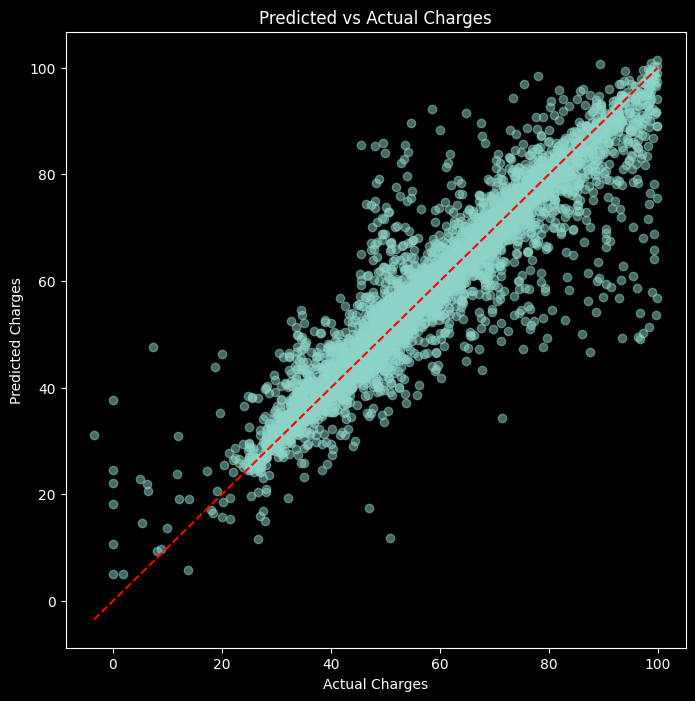

In [82]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_xg, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Predicted vs Actual Charges")
plt.show()